# Salary Range For Employees

## Postgres Database Conection

### Function to Connect the Postgres Database

In [11]:
import pandas as pd
from sqlalchemy import create_engine
from config import (ServerName, UserName, Password, port)
import psycopg2


def getData(DataBase, sql):
    engine = create_engine(f'postgres+psycopg2://{UserName}:{Password}@{ServerName}:{port}/{DataBase}')
    df_query = pd.read_sql(sql, engine)
    return df_query

### Query of the Database using the Function

In [12]:
# Define the query
sql = "select * from salaries"

# Store the query in a dataframe Table = "Employee"
salaries_df = getData("Employee", sql)

# Print Dataframe
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


## Histogram

### Bin Creation for Salaries

In [13]:
bins = [0, 49999, 59999, 69999, 79000, 89999,
        99999, 109999, 119999, 129999]

# Create labels for these bins
group_labels = ["0 to 49k", "50k to 59k", "60k to 69k", "70k to 79k", "80k to 89k", "90k to 99k",
                "100k to 109k", "110k to 119k", "120k to 129k"]

In [14]:
# Creating a new column with the salary ranges
salaries_df["Salary Range"] = pd.cut(salaries_df["salary"], bins, labels=group_labels)
# Print it
salaries_df.head()

,emp_no,salary,from_date,to_date,Salary Range
0,10001,60117,1986-06-26,1987-06-26,60k to 69k
1,10002,65828,1996-08-03,1997-08-03,60k to 69k
2,10003,40006,1995-12-03,1996-12-02,0 to 49k
3,10004,40054,1986-12-01,1987-12-01,0 to 49k
4,10005,78228,1989-09-12,1990-09-12,70k to 79k


In [15]:
# Group the Dataframe by Salary Range and Count
salaries_group_df = salaries_df.groupby("Salary Range")
# Count the number of employees
salaries_barchart_df = salaries_group_df[["emp_no"]].count()
# Rename the column to one more signifying
salaries_barchart_df = salaries_barchart_df.rename(columns={"emp_no" : "No. of Employees"})
salaries_barchart_df

,No. of Employees
Salary Range,
0 to 49k,158465
50k to 59k,57915
60k to 69k,41413
70k to 79k,23064
80k to 89k,13595
90k to 99k,4284
100k to 109k,1069
110k to 119k,195
120k to 129k,24


## Histogram

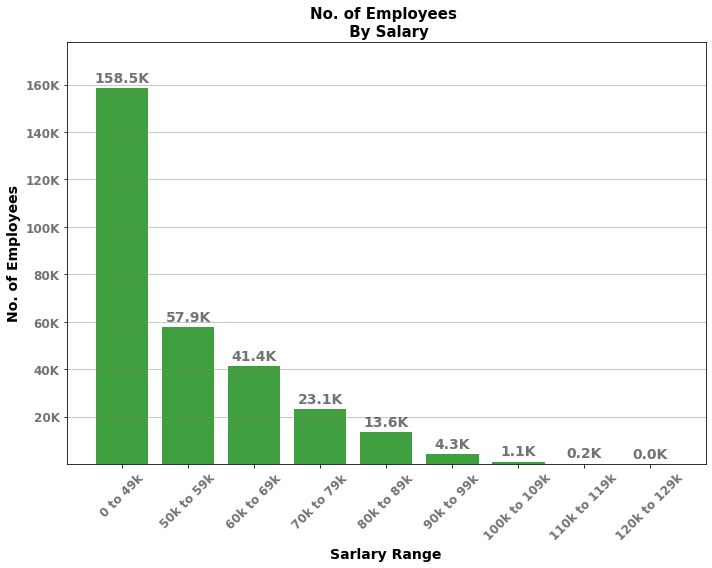

In [16]:
# Define libraries to plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define values in axes from previous data frames
range_Salary = group_labels
no_employees = salaries_barchart_df["No. of Employees"]

# Define Values in axes
x_axis = np.arange(len(range_Salary))

# Plot the chart with size
plt.figure(figsize=(10,8))
rects = plt.bar(x_axis, no_employees, color='green', alpha=0.75, align="center");

# Define locations for x axis and y axis
xtick_locations = [value for value in x_axis];

# Define locations and values for y axis
ytick_increment = 20e3
ytick_splits = 10
y_axis = range(1,10)
ytick_locations = [value*ytick_increment for value in y_axis];
ytick_values = ['{:,.0f}K'.format(value/1e3) for value in ytick_locations]

# Define the reference font size
ref_font_size = 12

# Add labels and Title
plt.xlabel('Sarlary Range',fontweight="bold", fontsize=ref_font_size+2)
plt.ylabel('No. of Employees',fontweight="bold", fontsize=ref_font_size+2)
plt.title('No. of Employees \n By Salary',fontweight="bold", fontsize=ref_font_size+3)

# Add x and y axis values
plt.xticks(xtick_locations, group_labels, rotation=45, 
           fontweight="bold", alpha=0.55, fontsize=ref_font_size)
plt.yticks(ytick_locations, ytick_values, rotation=0, 
           fontweight="bold", alpha=0.55, fontsize=ref_font_size)

# Add Grids
plt.grid(b=None, which='major', axis='y', color='grey',  alpha=0.55)

# Establish the upper limit of the plot
plt.ylim([0, round(max(no_employees),-3)+2e4])

# Function to  Autolabel columns in thousands
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:,.1f}K'.format(height/1e3),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0,
                    fontweight="bold", alpha=0.55, fontsize=ref_font_size+2)

# Run the plot to autolabel
autolabel(rects);

# Autofit
plt.tight_layout()
       
# Save Plot
plt.savefig("Fig 1. Histogram - No. of Employees By Salary" +'.png',bbox_inches='tight');

# Show Plot
plt.show()

## Barchart

### Processing Data

In [17]:
# Define the query
sql = "SELECT * FROM salaries as s INNER JOIN  titles as t ON s.emp_no = t.emp_no;"

# Store the query in a dataframe Table = "Employee"
salaries_by_title_df = getData("Employee", sql)

# Print Dataframe
salaries_by_title_df.head()

,emp_no,salary,from_date,to_date,emp_no,title,from_date,to_date
0,10005,78228,1989-09-12,1990-09-12,10005,Senior Staff,1996-09-12,9999-01-01
1,10005,78228,1989-09-12,1990-09-12,10005,Staff,1989-09-12,1996-09-12
2,10010,72488,1996-11-24,1997-11-24,10010,Engineer,1996-11-24,9999-01-01
3,10011,42365,1990-01-22,1991-01-22,10011,Staff,1990-01-22,1996-11-09
4,10018,55881,1987-04-03,1988-04-02,10018,Engineer,1987-04-03,1995-04-03


In [18]:
# Extract the neccessary columns
salaries_by_title_df = salaries_by_title_df[["title","salary"]]
# Rename columns
salaries_by_title_df = salaries_by_title_df.rename(columns={"title" : "Title", "salary" : "Salary"})
# Group Salaries by Title and Calculate its mean
salaries_by_title_df = salaries_by_title_df.groupby('Title').mean()
# Rename Columns Accordingly
salaries_by_title_df = salaries_by_title_df.rename(columns={"Salary" : "Average Salary"})
# Sort dataframe by Average Salary by Title
salaries_by_title_df = salaries_by_title_df.sort_values(by=['Average Salary'])
# Print the Resulting Dataframe
salaries_by_title_df

,Average Salary
Title,
Assistant Engineer,48493.204786
Senior Engineer,48506.751806
Engineer,48539.781423
Technique Leader,48580.505772
Manager,51531.041667
Staff,58465.271904
Senior Staff,58503.286614


In [19]:
# Extract titles (indexes) from the grouped dataframe
titles = []
i=0
for title in salaries_by_title_df["Average Salary"]:
    titles.append(salaries_by_title_df.index.get_level_values(0)[i])
    i+=1
# Print the Titles
titles

['Assistant Engineer',
 'Senior Engineer',
 'Engineer',
 'Technique Leader',
 'Manager',
 'Staff',
 'Senior Staff']

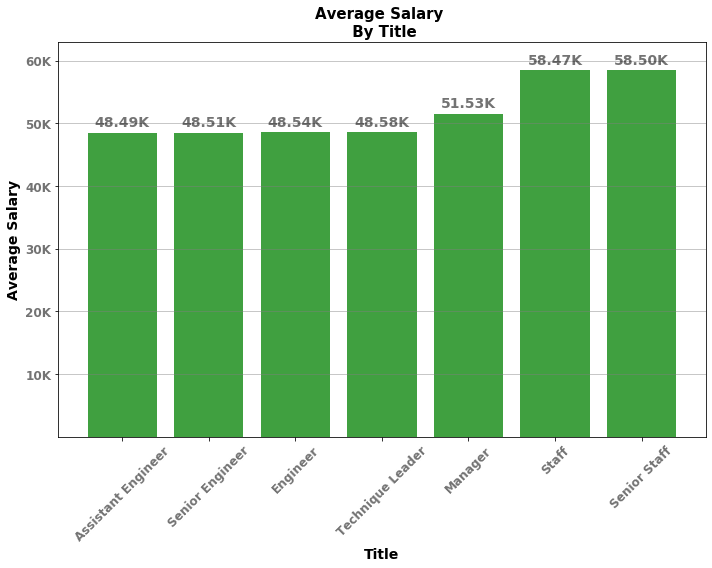

In [21]:
# Define libraries to plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define values in axes from previous data frames
title = titles
average_salary = salaries_by_title_df["Average Salary"]

# Define Values in axes
x_axis = np.arange(len(title))

# Plot the chart with size
plt.figure(figsize=(10,8))
rects = plt.bar(x_axis, average_salary, color='green', alpha=0.75, align="center");

# Define locations for x axis and y axis
xtick_locations = [value for value in x_axis];

# Define locations and values for y axis
ytick_increment = 10e3
ytick_splits = 8
y_axis = range(1,8)
ytick_locations = [value*ytick_increment for value in y_axis];
ytick_values = ['{:,.0f}K'.format(value/1e3) for value in ytick_locations]

# Define the reference font size
ref_font_size = 12

# Add labels and Title
plt.xlabel('Title',fontweight="bold", fontsize=ref_font_size+2)
plt.ylabel('Average Salary',fontweight="bold", fontsize=ref_font_size+2)
plt.title('Average Salary \n By Title',fontweight="bold", fontsize=ref_font_size+3)

# Add x and y axis values
plt.xticks(xtick_locations, titles, rotation=45, 
           fontweight="bold", alpha=0.55, fontsize=ref_font_size)
plt.yticks(ytick_locations, ytick_values, rotation=0, 
           fontweight="bold", alpha=0.55, fontsize=ref_font_size)

# Add Grids
plt.grid(b=None, which='major', axis='y', color='grey',  alpha=0.55)

# Establish the upper limit of the plot
plt.ylim([0, round(max(average_salary),-3)+4e3])

# Function to  Autolabel columns in thousands
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:,.2f}K'.format(height/1e3),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0,
                    fontweight="bold", alpha=0.55, fontsize=ref_font_size+2)

# Run the plot to autolabel
autolabel(rects);

# Autofit
plt.tight_layout()
       
# Save Plot
plt.savefig("Fig 2. Barchart - Salary by Title" +'.png',bbox_inches='tight');

# Show Plot
plt.show()